### SiC MOSFET - C2M0025120D
#### Ouliers Analysis and Removal using KDE and Box plots Visualisation 

- KDE plots
- Boxplots
- IQR-based outlier counts per column
(Optional exploring -Apply KMeans clustering, PCA)

*And final plotting and Detailed Summary Analysis of IQR-based outlier counts per column*

Loaded: mosfets_step2_no_zeros/C2M0025120D_no_zeros.csv with 119786 rows

KDE plots:


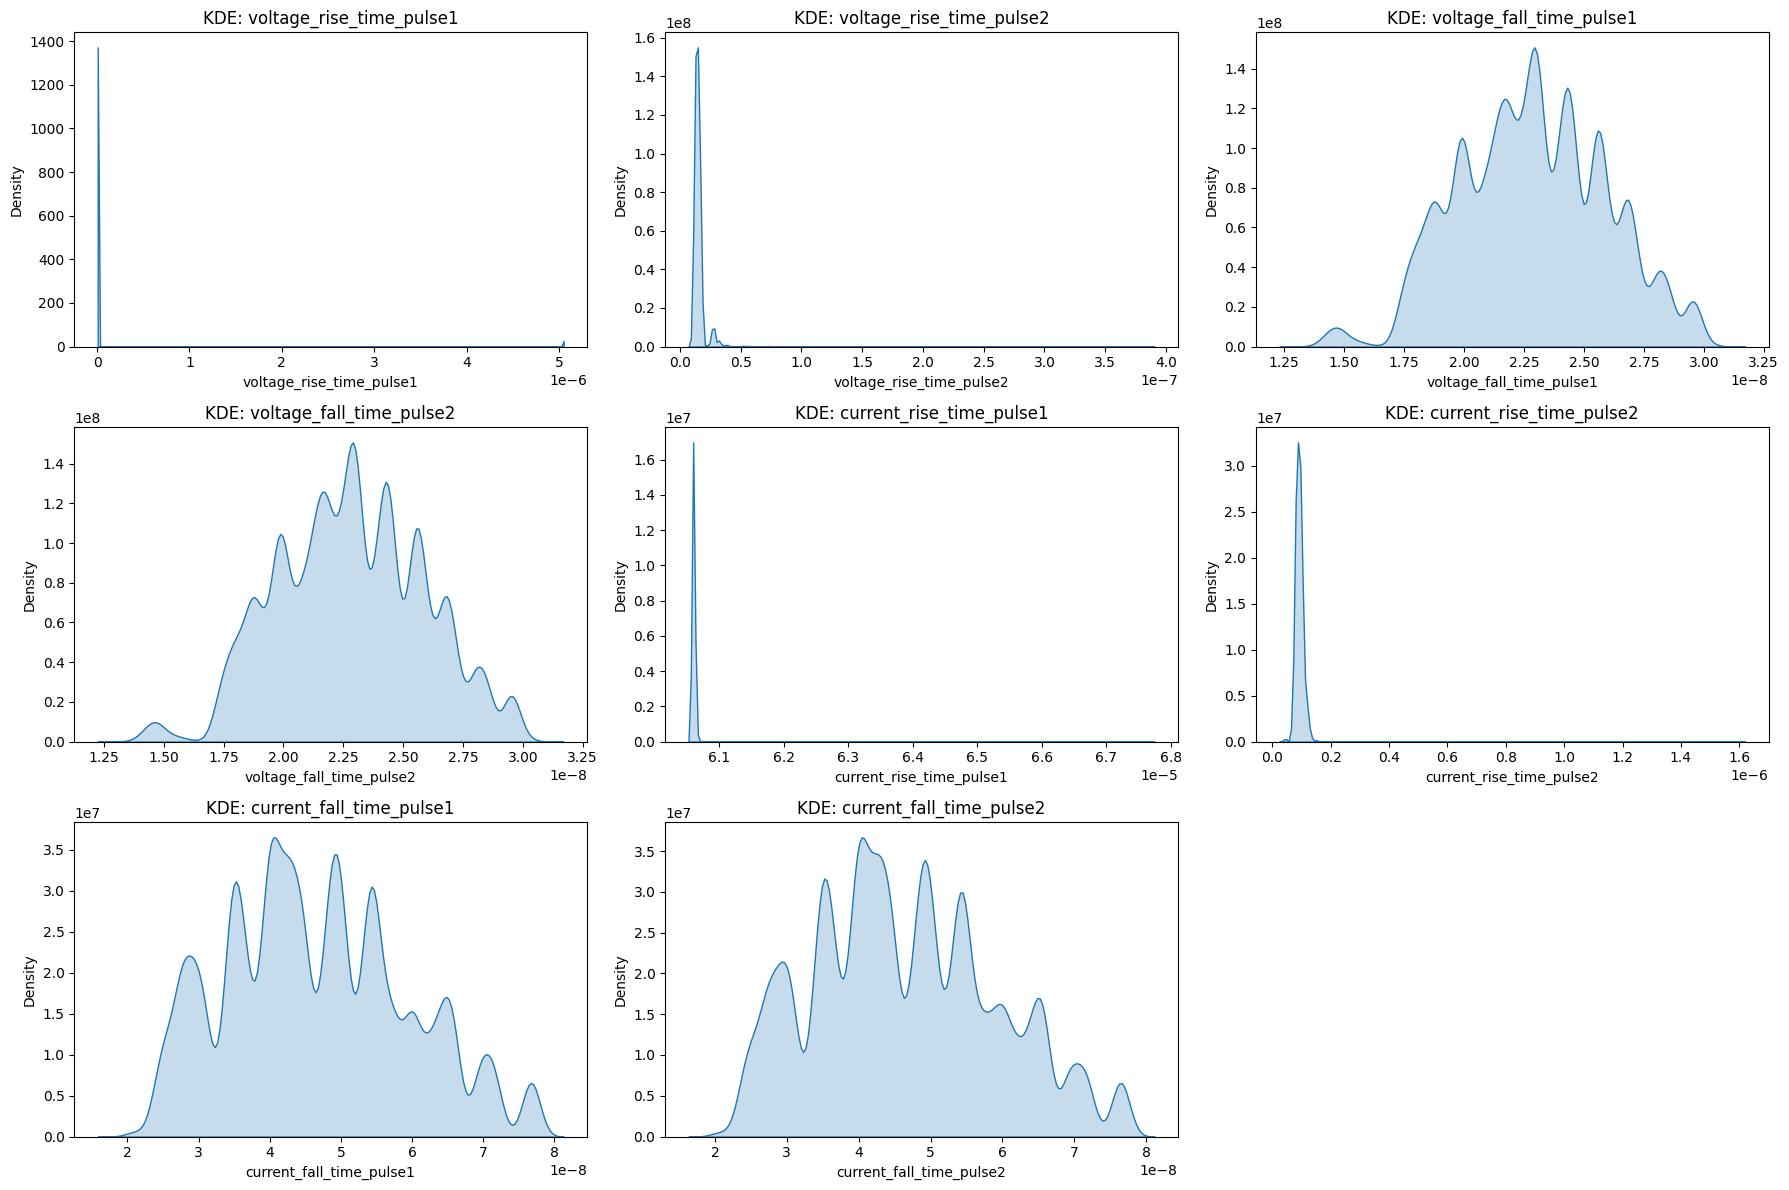

Boxplots:


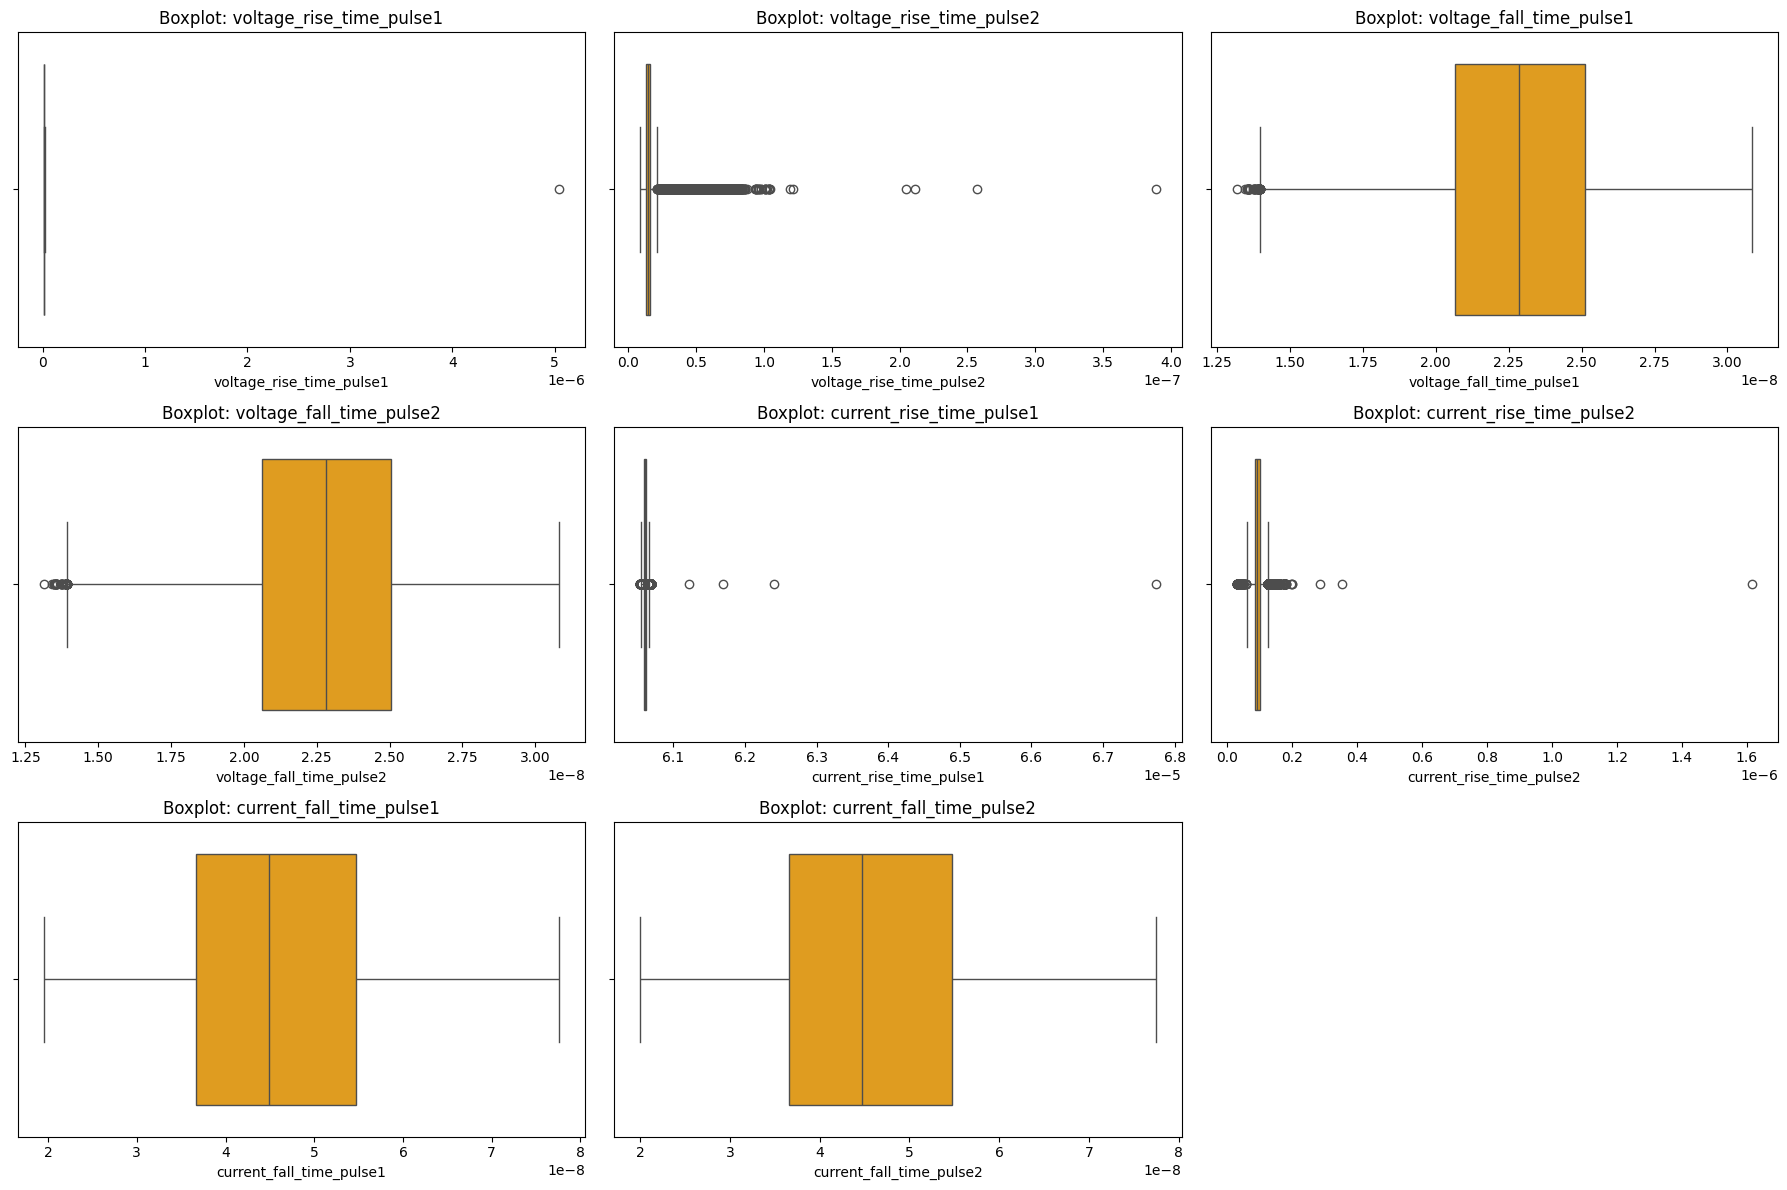

,count,mean,std,min,25%,50%,75%,max,range
voltage_rise_time_pulse1,119786.0,1.720000e-08,1.470000e-08,1.160000e-08,1.560000e-08,1.710000e-08,1.870000e-08,5.044900e-06,5.033400e-06
voltage_rise_time_pulse2,119786.0,1.530000e-08,5.800000e-09,8.700000e-09,1.280000e-08,1.430000e-08,1.600000e-08,3.889000e-07,3.802000e-07
voltage_fall_time_pulse1,119786.0,2.280000e-08,3.100000e-09,1.320000e-08,2.070000e-08,2.290000e-08,2.510000e-08,3.080000e-08,1.770000e-08
voltage_fall_time_pulse2,119786.0,2.280000e-08,3.100000e-09,1.310000e-08,2.060000e-08,2.280000e-08,2.510000e-08,3.080000e-08,1.770000e-08
current_rise_time_pulse1,119786.0,6.060450e-05,3.120000e-08,6.053590e-05,6.058930e-05,6.060480e-05,6.061860e-05,6.773690e-05,7.201000e-06
current_rise_time_pulse2,119786.0,9.320000e-08,1.410000e-08,2.840000e-08,8.420000e-08,9.210000e-08,1.008000e-07,1.616300e-06,1.587900e-06
current_fall_time_pulse1,119786.0,4.650000e-08,1.270000e-08,1.950000e-08,3.660000e-08,4.500000e-08,5.470000e-08,7.760000e-08,5.810000e-08
current_fall_time_pulse2,119786.0,4.650000e-08,1.270000e-08,2.000000e-08,3.660000e-08,4.480000e-08,5.470000e-08,7.750000e-08,5.750000e-08


IQR-based outlier counts per column:

voltage_rise_time_pulse1: 1 outliers
voltage_rise_time_pulse2: 7689 outliers
voltage_fall_time_pulse1: 50 outliers
voltage_fall_time_pulse2: 50 outliers
current_rise_time_pulse1: 1185 outliers
current_rise_time_pulse2: 2388 outliers
current_fall_time_pulse1: 0 outliers
current_fall_time_pulse2: 0 outliers


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the dataset of the mosfet C2M0025120D to remove the outliers 
FILE_PATH = "mosfets_step2_no_zeros/C2M0025120D_no_zeros.csv"  
df = pd.read_csv(FILE_PATH)

# The time columns from the output or target 
time_columns = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2'
]

# Just a quick display to check the right file and the rows 
print(f"Loaded: {FILE_PATH} with {len(df)} rows\n")

# KDE plotting for understanding the distribution and outliers
print("KDE plots:")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(time_columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(f"KDE: {col}")
for j in range(len(time_columns), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Box Plots for the ouliers
print("Boxplots:")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(time_columns):
    sns.boxplot(x=df[col], ax=axes[i], color='orange')
    axes[i].set_title(f"Boxplot: {col}")
for j in range(len(time_columns), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Adding the range and min and max to check 
describe_df = df[time_columns].describe().T
describe_df["range"] = describe_df["max"] - describe_df["min"]
display(describe_df.round(10))

# VERY IMPOTANT FOR UNDERSTANDING THE DISTRIBUTION
print("IQR-based outlier counts per column:\n")
for col in time_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Now lets remove these ouliers from:

- voltage_rise_time_pulse1: 1 outliers
- voltage_fall_time_pulse1: 50 outliers
- voltage_fall_time_pulse2: 50 outliers

Total outlier rows: 10089


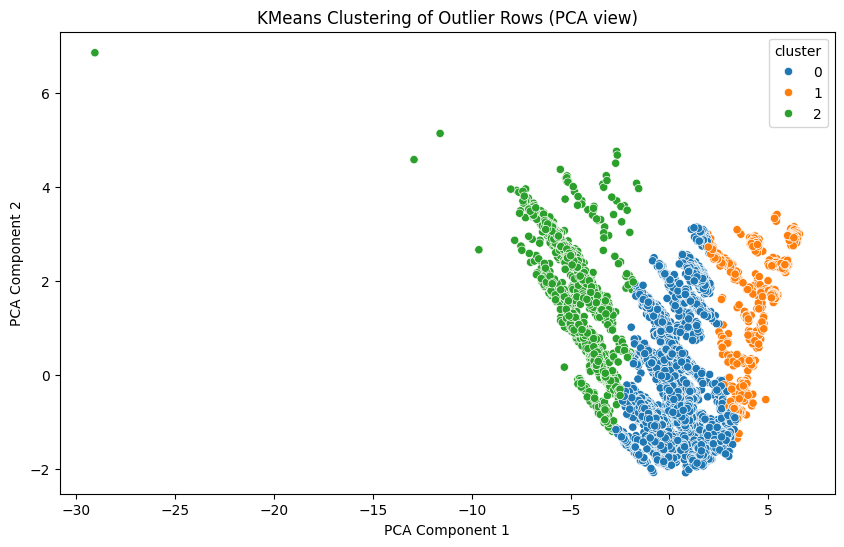


EMI Mean per Cluster:
         overshoot_pulse_1  overshoot_pulse_2  undershoot_pulse_1  \
cluster                                                             
0                  74.9989            77.2527            -36.7269   
1                  50.4629            32.2401            -25.5424   
2                 102.1862           149.4528            -65.7306   

         undershoot_pulse_2  ringing_frequency_MHz  
cluster                                             
0                  -37.6544                43.5409  
1                  -25.6292                47.1352  
2                  -66.4333                57.7874  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Reloading 
FILE = "mosfets_step2_no_zeros/C2M0025120D_no_zeros.csv"
df = pd.read_csv(FILE)

# Again the times columns 
time_cols = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2'
]

# The EMI - overshoot undershoot and the rining frquency solumns to compare
emi_cols = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz'
]

# Again IQR based outlier
outlier_df = pd.DataFrame()
for col in time_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (df[col] < lower) | (df[col] > upper)
    outlier_df = pd.concat([outlier_df, df[mask]])

outlier_df.drop_duplicates(inplace=True)
print(f"Total outlier rows: {len(outlier_df)}")

# Preparing the data for clustering
features_for_clustering = time_cols + emi_cols
data = outlier_df[features_for_clustering].dropna()

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3 clusters with KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['cluster'] = clusters

# PCA Visualisations
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['pca1'] = pca_result[:, 0]
data['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title("KMeans Clustering of Outlier Rows (PCA view)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


print("\nEMI Mean per Cluster:")
print(data.groupby("cluster")[emi_cols].mean().round(4))


Now plotting for just two values 


 voltage_fall_time_pulse1: Found 50 outliers


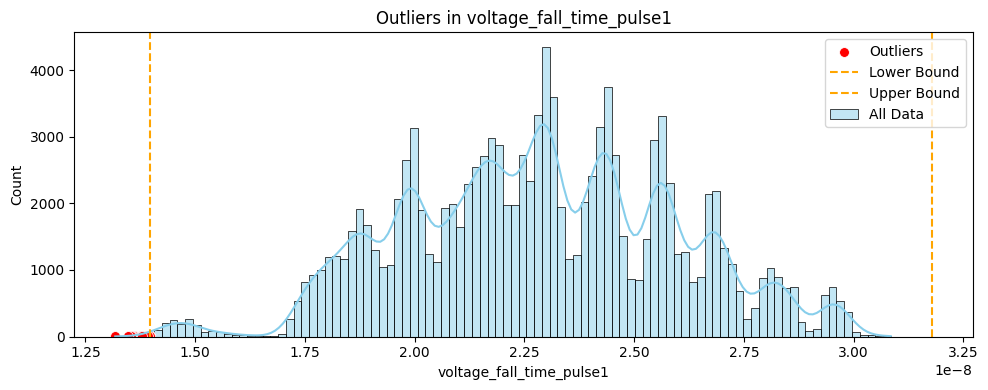


 voltage_fall_time_pulse2: Found 50 outliers


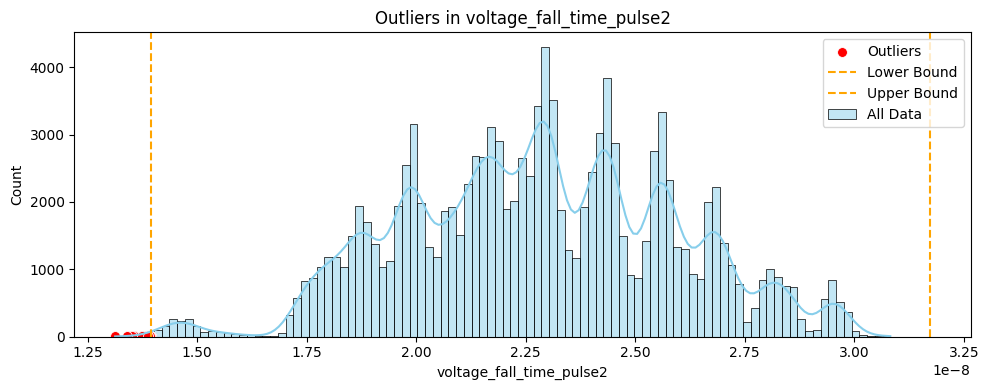

In [4]:

columns_to_plot = ['voltage_fall_time_pulse1', 'voltage_fall_time_pulse2']

for col in columns_to_plot:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"\n {col}: Found {len(outliers)} outliers")

    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], bins=100, kde=True, color='skyblue', label='All Data')
    sns.scatterplot(x=outliers[col], y=[5]*len(outliers), color='red', label='Outliers', s=50)
    plt.axvline(lower, color='orange', linestyle='--', label='Lower Bound')
    plt.axvline(upper, color='orange', linestyle='--', label='Upper Bound')
    plt.title(f"Outliers in {col}")
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()


The above ourliers can be just the EMI no need for removal

In [7]:
import pandas as pd

df = pd.read_csv("mosfets_step2_no_zeros/C2M0025120D_no_zeros.csv")
 # to see the number of rows 
print(f"Remaining rows after removing voltage_rise_time_pulse1 outliers: {df.shape[0]}")
#removing thes eoutliers 
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers found")
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Step 2: Remove only from voltage_rise_time_pulse1
df_filtered = remove_outliers_iqr(df, 'voltage_rise_time_pulse1')

# Step 3: Check the shape
print(f"Remaining rows after removing voltage_rise_time_pulse1 outliers: {df_filtered.shape[0]}")


Remaining rows after removing voltage_rise_time_pulse1 outliers: 119786
voltage_rise_time_pulse1: 1 outliers found
Remaining rows after removing voltage_rise_time_pulse1 outliers: 119785


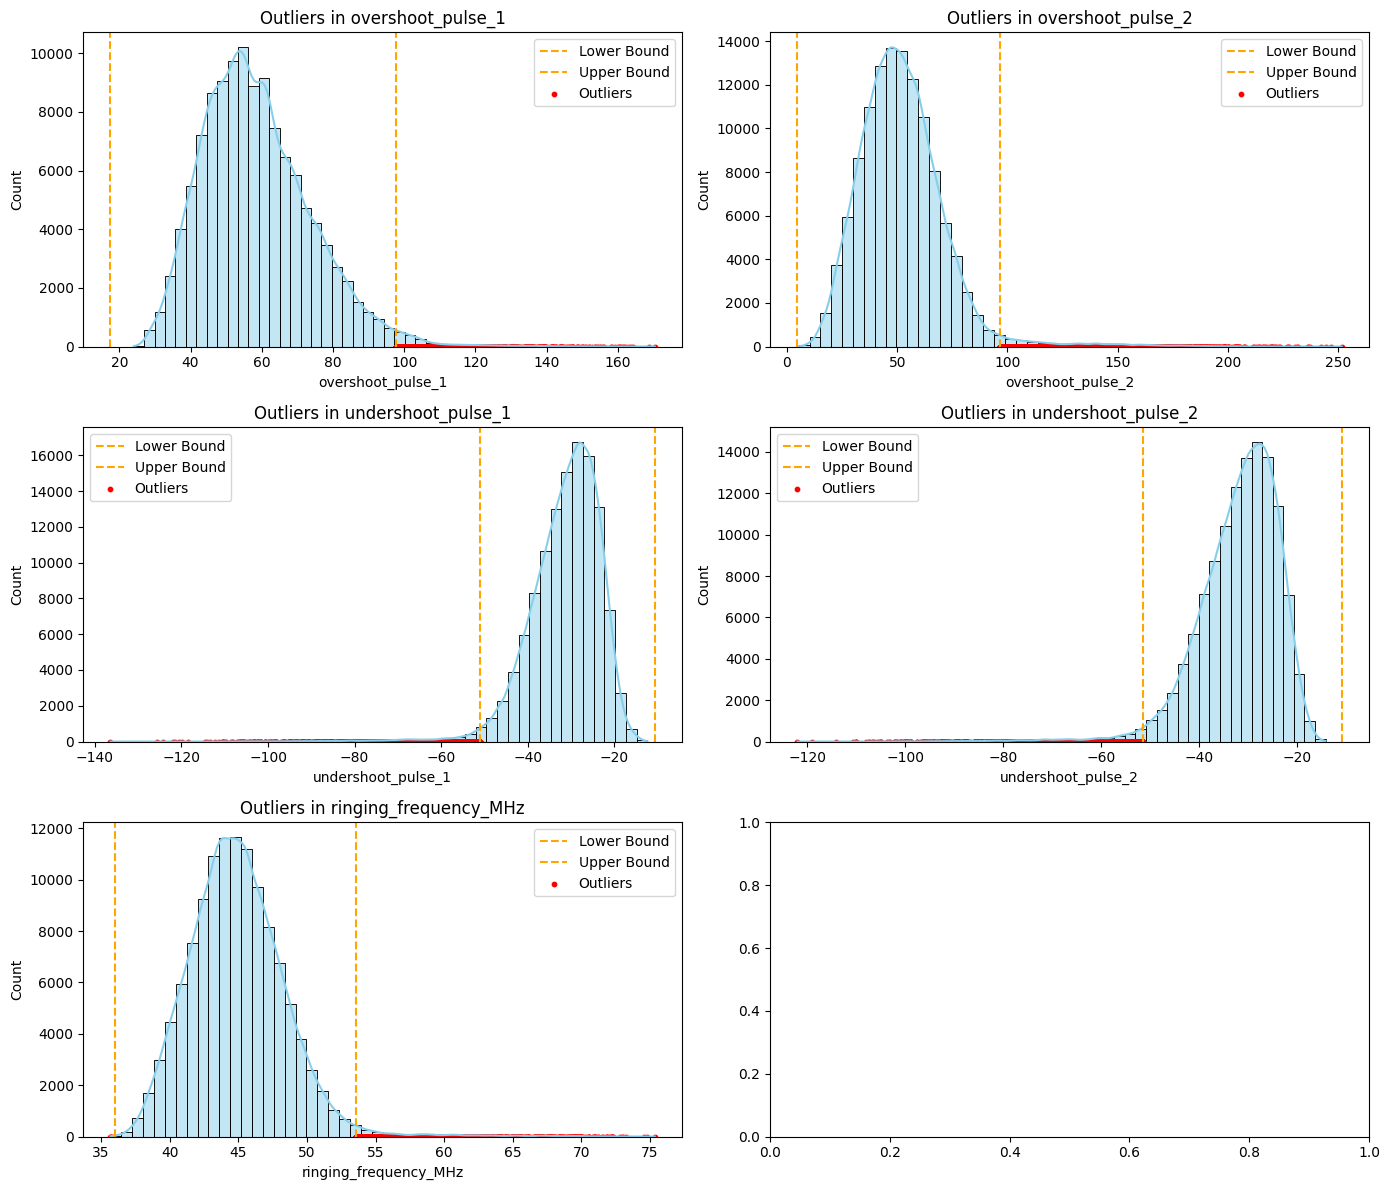

IQR-based Outlier Summary:


,min,max,iqr_lower,iqr_upper,outliers,range
overshoot_pulse_1,24.057129,170.370850,17.526245,97.757690,1746.0,146.313721
overshoot_pulse_2,5.319580,251.565186,4.770782,96.663116,2619.0,246.245605
undershoot_pulse_1,-136.393005,-12.376389,-50.929290,-10.644095,2194.0,124.016617
undershoot_pulse_2,-121.995514,-14.246931,-51.547527,-10.941845,2340.0,107.748583
ringing_frequency_MHz,35.686539,75.345309,36.001533,53.547512,1622.0,39.658770


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EMI OUTPUT COLUMNS 
target_columns = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz'
]

outlier_stats = {}

# Plotting
n_cols = 2
n_rows = (len(target_columns) + 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(target_columns):
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_filtered[(df_filtered[col] < lower) | (df_filtered[col] > upper)]
    outlier_stats[col] = {
        'min': df_filtered[col].min(),
        'max': df_filtered[col].max(),
        'iqr_lower': lower,
        'iqr_upper': upper,
        'outliers': len(outliers)
    }

    # Plots
    sns.histplot(df_filtered[col], bins=50, kde=True, ax=axs[i], color='skyblue')
    axs[i].axvline(lower, color='orange', linestyle='--', label='Lower Bound')
    axs[i].axvline(upper, color='orange', linestyle='--', label='Upper Bound')
    axs[i].scatter(outliers[col], [0]*len(outliers), color='red', s=10, label='Outliers')
    axs[i].set_title(f"Outliers in {col}")
    axs[i].legend()

plt.tight_layout()
plt.show()

# Sumamry 
summary_df = pd.DataFrame(outlier_stats).T
summary_df['range'] = summary_df['max'] - summary_df['min']
print("IQR-based Outlier Summary:")
display(summary_df)


In [10]:
# Conservative filtering of extreme EMI values

# Removing extreme overshoot_pulse_2 > 200V
df_filtered = df_filtered[df_filtered['overshoot_pulse_2'] < 200]

# undershoot_pulse_1 < -130V
df_filtered = df_filtered[df_filtered['undershoot_pulse_1'] > -130]

#undershoot_pulse_2 < -130V
df_filtered = df_filtered[df_filtered['undershoot_pulse_2'] > -130]

#index after filtering
df_filtered.reset_index(drop=True, inplace=True)

print(f"Remaining rows after conservative outlier removal: {len(df_filtered)}")


Remaining rows after conservative outlier removal: 119730


FINAL PLOTTING 

 Negative Value Count Per Target:
undershoot_pulse_1    119730
undershoot_pulse_2    119730
dtype: int64

 Final IQR-based Outlier Summary:


,min,max,iqr_lower,iqr_upper,outliers,range
overshoot_pulse_1,2.405713e+01,1.703708e+02,1.754839e+01,9.771001e+01,1697.0,1.463137e+02
overshoot_pulse_2,5.319580e+00,1.999631e+02,4.768730e+00,9.663927e+01,2566.0,1.946436e+02
undershoot_pulse_1,-1.255926e+02,-1.237639e+01,-5.090906e+01,-1.065287e+01,2150.0,1.132162e+02
undershoot_pulse_2,-1.189646e+02,-1.424693e+01,-5.152309e+01,-1.095395e+01,2297.0,1.047176e+02
ringing_frequency_MHz,3.568654e+01,7.534531e+01,3.600451e+01,5.353936e+01,1579.0,3.965877e+01
voltage_rise_time_pulse1,1.155033e-08,2.285849e-08,1.085098e-08,2.340233e-08,0.0,1.130816e-08
voltage_rise_time_pulse2,8.688326e-09,3.888613e-07,7.885129e-09,2.089428e-08,7634.0,3.801730e-07
voltage_fall_time_pulse1,1.317941e-08,3.084587e-08,1.399067e-08,3.178223e-08,52.0,1.766647e-08
voltage_fall_time_pulse2,1.312906e-08,3.082325e-08,1.394878e-08,3.172996e-08,53.0,1.769419e-08
current_rise_time_pulse1,6.053588e-05,6.773690e-05,6.054521e-05,6.066265e-05,1182.0,7.201020e-06


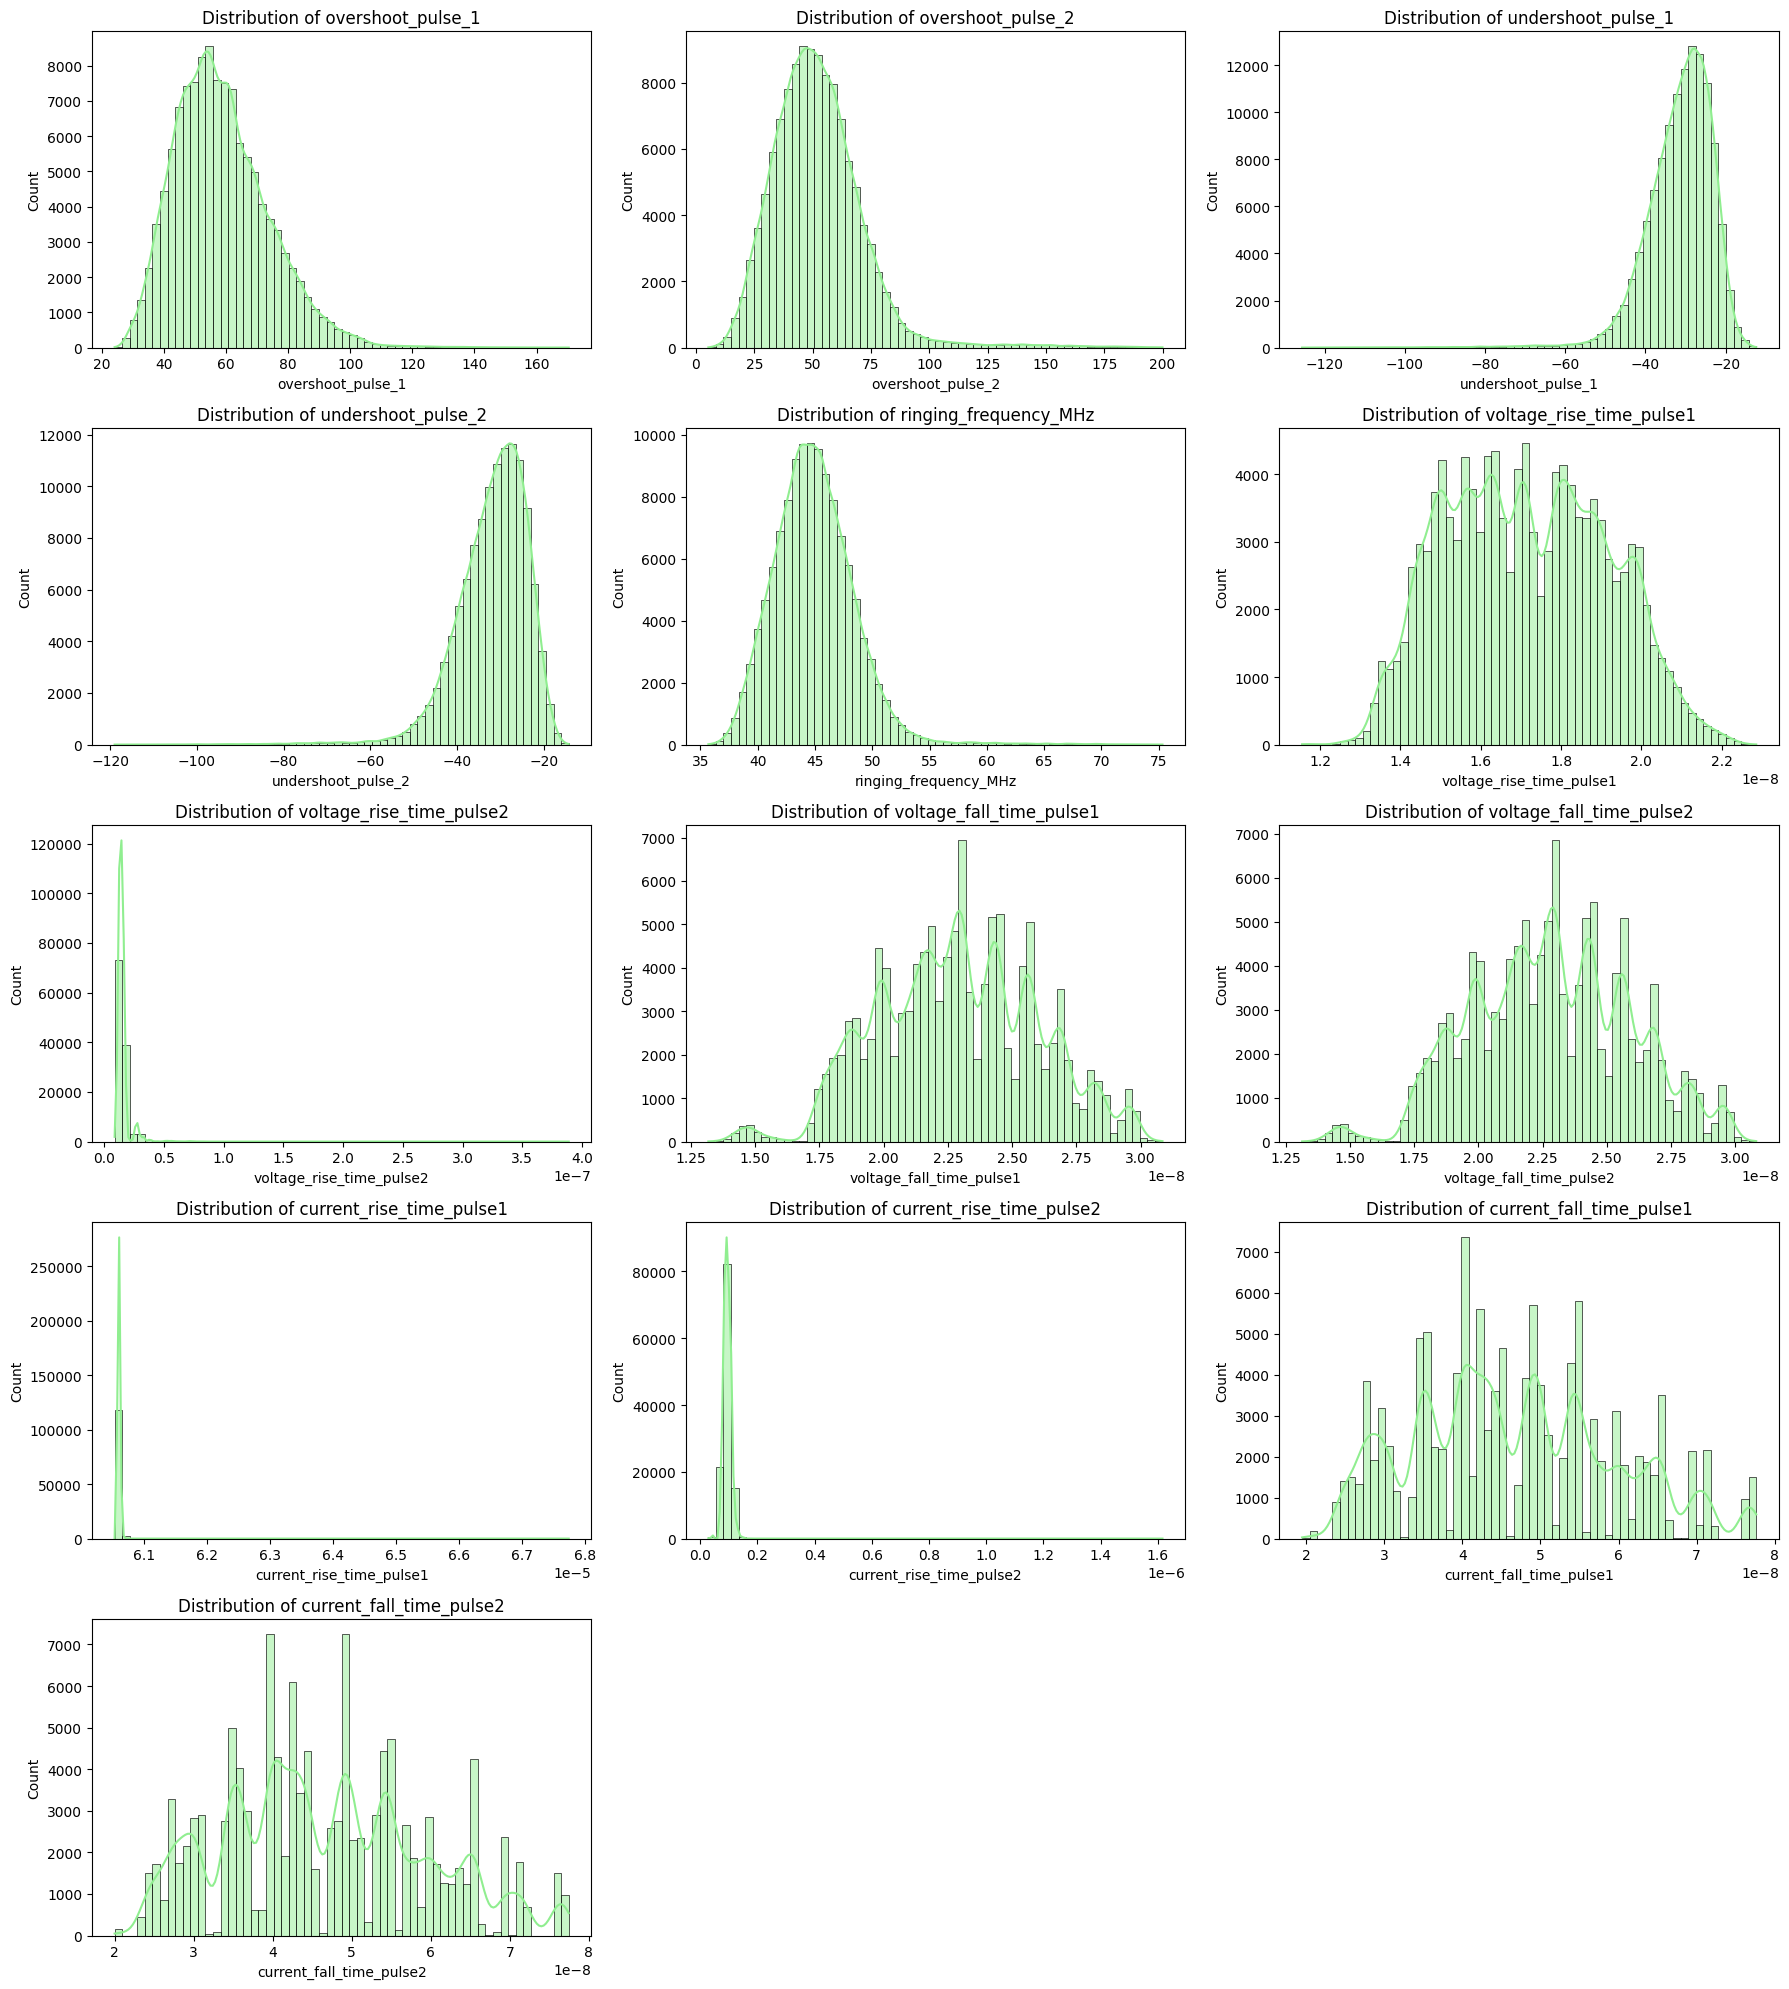

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EMI target columns
target_columns = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz',
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2',
]

# negative values (should not exist for rise/fall, freq, overshoot)
check_negative = df_filtered[target_columns].lt(0)
negative_counts = check_negative.sum()
print(" Negative Value Count Per Target:")
print(negative_counts[negative_counts > 0])

#IQR-based outliers
outlier_stats = {}
for col in target_columns:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_filtered[(df_filtered[col] < lower) | (df_filtered[col] > upper)]
    
    outlier_stats[col] = {
        'min': df_filtered[col].min(),
        'max': df_filtered[col].max(),
        'iqr_lower': lower,
        'iqr_upper': upper,
        'outliers': len(outliers),
        'range': df_filtered[col].max() - df_filtered[col].min()
    }

summary_df = pd.DataFrame(outlier_stats).T
print("\n Final IQR-based Outlier Summary:")
display(summary_df)

# Plot final cleaned EMI output distributions 
n_cols = 3
n_rows = (len(target_columns) + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(target_columns):
    sns.histplot(df_filtered[col], bins=60, kde=True, ax=axs[i], color='lightgreen')
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Count")

for j in range(len(target_columns), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


In [12]:
df_filtered.to_csv('mosfets_step3_final_cleaned/C2M0025120D_cleaned.csv', index=False)
print(" Saved to: mosfets_step3_final_cleaned/C2M0025120D_cleaned.csv")


 Saved to: mosfets_step3_final_cleaned/C2M0025120D_cleaned.csv
